## WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90.00, 90.00)
lng_range = (-180.00, 180.00)

# Generate Cities List

In [58]:
# Creates a function that generates randon coordinates, finds the nearest city of each coordinate and get the information 
# needed to the plots further in the code from the weather url

def find_information():
    
    def find_cities():

        coords = []
       
        #Generate a random list of 500+ cities
        lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
        long = np.random.uniform(lng_range[0], lng_range[1], size=1500)
        coords = list(zip(lat,long))


        for coord in coords:
            cityname = citipy.nearest_city(float(coord[0]), float(coord[1])).city_name
           
            #If the city is is not in the list of cities, then add the city to the list
            if cityname not in cities:
                cities.append(cityname)
        
        # Returns the result of the funcion find_cities, which is a list of cities that will be used for the API calls in the
        # function find_information
        return cities
         

    # to make sure that at least 650 cities will make to the api call
    if len('total_cities') <650:
        total_cities = find_cities()
 
    # Define variables
    response = []
    hum_list = []
    cl_list = []
    speed_list = []
    tmp_list = []
    lt_list = []
    lng_list = []
    ct_list = []
    country_list = []
    date_list = []
    
    # Base url
    base_url = 'http://api.openweathermap.org/data/2.5/weather?'    
    
    # query url for each city
    for city in total_cities:
        query_url = f"{base_url}&q={city}&units=imperial&id=Default&appid={weather_api_key}"
        
        #Get data and Jsonize it
        response = requests.get(query_url).json()
  
        try:
            # adds respective information for each list
            tmp_list.append(response["main"]["temp_max"])
            hum_list.append(response["main"]["humidity"])
            cl_list.append(response["clouds"]["all"])
            speed_list.append(response["wind"]["speed"])
            lt_list.append(response["coord"]["lat"])
            lng_list.append(response["coord"]["lon"])
            ct_list.append(response["name"])
            country_list.append(response["sys"]["country"])
            date_list.append(response["dt"])
            
        except:
            pass
    
    return tmp_list, hum_list, cl_list, speed_list, lt_list, lng_list, ct_list, country_list, date_list

In [59]:
cities = []
# Assigns the lists returned by the function to variables
temp_list, humidity_list, cloud_list, ws_list, lat_list, long_list, city_list, country, dates = find_information()

# Checks if the number of valid cities is at least 500. If it isn't it calls the function again to generate new outputs
if len(temp_list) <500:
    temp_list = []
    humidity_list = []
    cloud_list = []
    ws_list = []
    lat_list = []
    long_list =[]
    city_list = []
    country = []
    dates = []
    find_information()
print(len(temp_list))

570


# Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame# 

In [60]:
#Create dataframe
info_df =pd.DataFrame({
    'City':city_list,
    'Lat':lat_list,
    'Lng':long_list,
    'Max Temp':temp_list,
    'Humidity': humidity_list,
    'Cloudiness': cloud_list,
    'Wind Speed': ws_list,
    'Country' : country,
    'Date' : dates})

info_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar del Plata,-38.0023,-57.5575,64.40,63,40,8.05,AR,1619463357
1,Bengkulu,-3.8004,102.2655,75.52,89,50,4.29,ID,1619463357
2,Vaini,-21.2000,-175.2000,77.00,94,75,5.75,TO,1619463358
3,Inongo,-1.9500,18.2667,76.75,81,11,1.66,CD,1619463358
4,Chernyshevskiy,63.0128,112.4714,9.28,86,12,6.53,RU,1619463359
...,...,...,...,...,...,...,...,...,...
565,Araouane,18.9048,-3.5265,95.41,11,37,12.30,ML,1619463611
566,Tomatlán,19.9333,-105.2500,92.07,33,100,10.29,MX,1619463454
567,Taoudenni,22.6783,-3.9836,99.57,10,71,9.24,ML,1619463611
568,Elko,41.0002,-115.5012,44.01,70,90,13.80,US,1619463612


In [61]:
info_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.761702,15.741733,61.953702,67.145614,54.856140,7.803737,1.619463e+09
std,33.112579,92.108702,20.870646,23.716875,39.028272,5.152191,8.854449e+01
min,-54.800000,-179.166700,-3.170000,5.000000,0.000000,0.360000,1.619463e+09
25%,-7.144200,-68.205975,46.517500,53.000000,14.000000,4.182500,1.619463e+09
50%,22.852150,20.334000,64.920000,72.000000,70.000000,6.720000,1.619463e+09
75%,46.751000,92.862500,79.090000,87.000000,95.000000,10.360000,1.619464e+09
max,78.218600,178.416700,100.400000,100.000000,100.000000,33.380000,1.619464e+09


In [62]:
#Re-order columns and export the city data into a .csv. 


output_data_file = info_df[['City','Cloudiness','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']]
output_data_file.to_csv('output_data/cities.csv', index_label='City ID', index=True, header=True)


# Inspect the data and remove the cities where the humidity > 100%

In [63]:
#  Get the indices of cities that have humidity over 100%.

index_value = output_data_file[output_data_file['Humidity']>100].index

# Plot clean dataframe if data is removed
if len(index_value) > 0:
    clean_city_data = output_data_file.drop(index=output_data_file.index[index_value])
    clean_city_data.head()
    

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot 

In [64]:
today = date.today()
today = today.strftime("%m/%d/%Y")

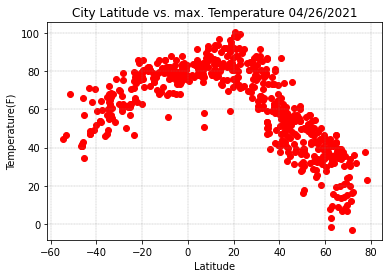

In [65]:
plt.scatter(lat_list, temp_list, color='r')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.title('City Latitude vs. max. Temperature ' + str(today))
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.savefig('output_data/temp_lat.png')
plt.show()

# Latitude vs. Humidity Plot

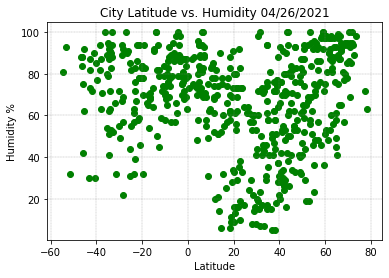

In [66]:
plt.scatter(lat_list, humidity_list, color='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity ' + str(today))
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.savefig('output_data/humidity_lat.png')
plt.show()

# Latitude vs. Cloudiness Plot

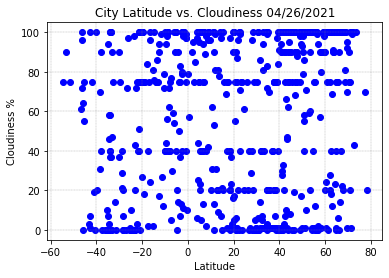

In [67]:
plt.scatter(lat_list, cloud_list, color='blue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness ' + str(today))
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.savefig('output_data/cloudiness_lat.png')
plt.show()

# Latitude vs. Wind Speed Plot

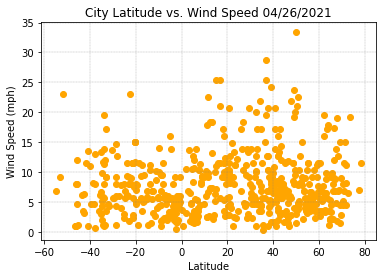

In [68]:
plt.scatter(lat_list, ws_list, color='orange')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed ' + str(today))
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.savefig('output_data/ws_lat.png')
plt.show()

# Linear Regression

In [69]:
# Split data by hemisphere

hem_north = []
temp_north = []
humidity_north = []
cloudiness_north = []
ws_north = []
hem_south = []
temp_south = []
humidity_south = []
cloudiness_south = []
ws_south = []

for i in range(len(lat_list)):
    if (lat_list[i]) >= 0.0:
        hem_north.append(lat_list[i])
        temp_north.append(temp_list[i])
        humidity_north.append(humidity_list[i])
        cloudiness_north.append(cloud_list[i])
        ws_north.append(ws_list[i])
    else:
        hem_south.append(lat_list[i])
        temp_south.append(temp_list[i])
        humidity_south.append(humidity_list[i])
        cloudiness_south.append(cloud_list[i])
        ws_south.append(ws_list[i])        


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-square = 0.75


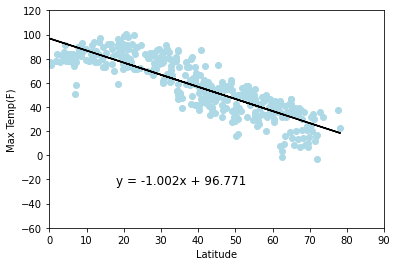

The plot above shows a linear correlation between temperature and latitude in the north hemisphere.



In [70]:
# Temp plots
regress_values=[]
(slope, intercept, rvalue, pvalue, stderr) = linregress(hem_north,temp_north)
print("R-square = " + str(round(rvalue **2,2)))
regress_values = np.asarray(hem_north) * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
fig, ax = plt.subplots()
plt.scatter(hem_north,temp_north,  color = 'lightblue')
plt.plot(hem_north,regress_values,"black")
ax.annotate(line_eq,xy=(0.2, 0.2),xycoords='axes fraction',fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
plt.xlim(0,90)
plt.ylim(-60,120)
plt.savefig('output_data/temp_north.png')
plt.show()
if (rvalue**2)> 0.6:
    print('The plot above shows a linear correlation between temperature and latitude in the north hemisphere.')
else:
    print('The plot above does not show any linear correlation between temperature and latitude in the north hemisphere.')
print('')


###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-square = 0.59


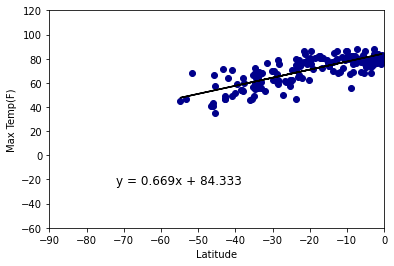

The plot above shows a linear correlation between temperature and latitude in the south hemisphere.



In [71]:
# Temp plots
regress_values=[]
(slope, intercept, rvalue, pvalue, stderr) = linregress(hem_south,temp_south)
print("R-square = " + str(round(rvalue **2,2)))
regress_values = np.asarray(hem_south) * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
fig, ax = plt.subplots()
plt.scatter(hem_south,temp_south,  color = 'darkblue')
plt.plot(hem_south,regress_values,"black")
ax.annotate(line_eq,xy=(0.2, 0.2),xycoords='axes fraction',fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
plt.xlim(-90,0)
plt.ylim(-60,120)
plt.savefig('output_data/temp_south.png')
plt.show()
if (rvalue**2)> 0.5:
    print('The plot above shows a linear correlation between temperature and latitude in the south hemisphere.')
else:
    print('The plot above does not show any linear correlation between temperature and latitude in the south hemisphere.')
print('')

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-square = 0.05


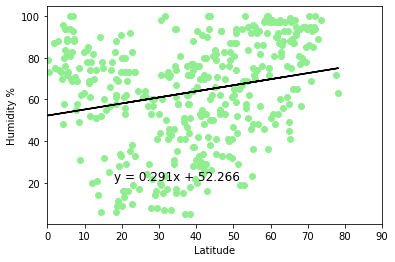

The plot above does not show any linear correlation between humidity and latitude in the north hemisphere.



In [72]:
# Humidity plots
regress_values=[]
(slope, intercept, rvalue, pvalue, stderr) = linregress(hem_north,humidity_north)
print("R-square = " + str(round(rvalue **2,2)))
regress_values = np.asarray(hem_north) * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
fig, ax = plt.subplots()
plt.scatter(hem_north,humidity_north,  color = 'lightgreen')
plt.plot(hem_north,regress_values,"black")
ax.annotate(line_eq,xy=(0.2, 0.2),xycoords='axes fraction',fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.xlim(0,90)
plt.savefig('output_data/humidity_north.png')
plt.show()
if (rvalue**2)> 0.5:
    print('The plot above shows a linear correlation between humidity and latitude in the north hemisphere.')
else:
    print('The plot above does not show any linear correlation between humidity and latitude in the north hemisphere.')
print('')

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-square = 0.01


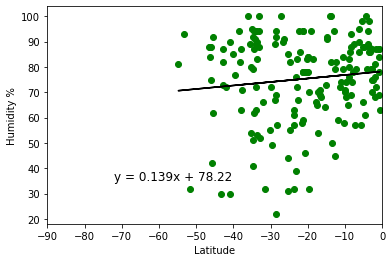

The plot above does not show any linear correlation between humidity and latitude in the south hemisphere.



In [73]:
# Humidity plots
regress_values=[]
(slope, intercept, rvalue, pvalue, stderr) = linregress(hem_south,humidity_south)
print("R-square = " + str(round(rvalue **2,2)))
regress_values = np.asarray(hem_south) * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
fig, ax = plt.subplots()
plt.scatter(hem_south,humidity_south,  color = 'green')
plt.plot(hem_south,regress_values,"black")
ax.annotate(line_eq,xy=(0.2, 0.2),xycoords='axes fraction',fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.xlim(-90,0)
plt.savefig('output_data/humidity_south.png')
plt.show()
if (rvalue**2)> 0.5:
    print('The plot above shows a linear correlation between humidity and latitude in the south hemisphere.')
else:
    print('The plot above does not show any linear correlation between humidity and latitude in the south hemisphere.')
print('')

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-square = 0.01


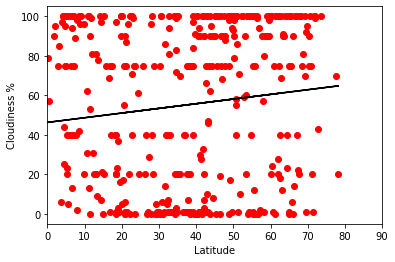

The plot above does not show any linear correlation between percentage of clouds and latitude in the north hemisphere.



In [74]:
# Cloudiness plots
regress_values=[]
(slope, intercept, rvalue, pvalue, stderr) = linregress(hem_north,cloudiness_north)
print("R-square = " + str(round(rvalue **2,2)))
regress_values = np.asarray(hem_north) * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(hem_north,cloudiness_north,  color = 'red')
plt.plot(hem_north,regress_values,"black")
ax.annotate(line_eq,xy=(0.2, 0.2),xycoords='axes fraction',fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.xlim(0,90)
plt.savefig('output_data/cloudiness_north.png')
plt.show()
if (rvalue**2)> 0.5:
    print('The plot above shows a linear correlation between percentage of clouds and latitude in the north hemisphere.')
else:
    print('The plot above does not show any linear correlation between percentage of clouds and latitude in the north hemisphere.')
print('')

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-square = 0.04


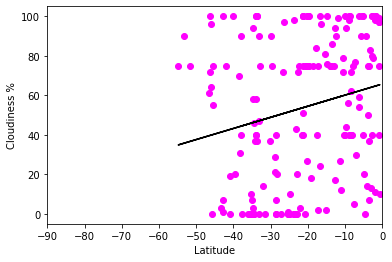

The plot above does not show any linear correlation between percentage of clouds and latitude in the south hemisphere.



In [75]:
# Cloudiness plots
regress_values=[]
(slope, intercept, rvalue, pvalue, stderr) = linregress(hem_south,cloudiness_south)
print("R-square = " + str(round(rvalue **2,2)))
regress_values = np.asarray(hem_south) * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(hem_south,cloudiness_south,  color = 'magenta')
plt.plot(hem_south,regress_values,"black")
ax.annotate(line_eq,xy=(0.2, 0.2),xycoords='axes fraction',fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.xlim(-90,0)
plt.savefig('output_data/cloudiness_south.png')
plt.show()
if (rvalue**2)> 0.5:
    print('The plot above shows a linear correlation between percentage of clouds and latitude in the south hemisphere.')
else:
    print('The plot above does not show any linear correlation between percentage of clouds and latitude in the south hemisphere.')
print('')

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-square = 0.0


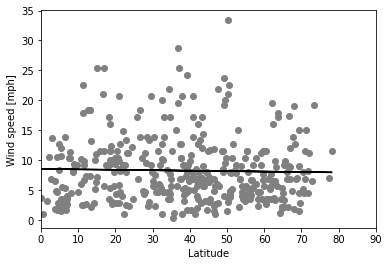

The plot above does not show any linear correlation between wind speed and latitude in the north hemisphere.



In [76]:
# Wind speed plots
regress_values=[]
(slope, intercept, rvalue, pvalue, stderr) = linregress(hem_north,ws_north)
print("R-square = " + str(round(rvalue **2,2)))
regress_values = np.asarray(hem_north) * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(hem_north,ws_north,  color = 'grey')
plt.plot(hem_north,regress_values,"black")
ax.annotate(line_eq,xy=(0.2, 0.2),xycoords='axes fraction',fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind speed [mph]')
plt.xlim(0,90)
plt.savefig('output_data/ws_north.png')
plt.show()
if (rvalue**2)> 0.5:
    print('The plot above shows a linear correlation between wind speed and latitude in the north hemisphere.')
else:
    print('The plot above does not show any linear correlation between wind speed and latitude in the north hemisphere.')
print('')

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-square = 0.03


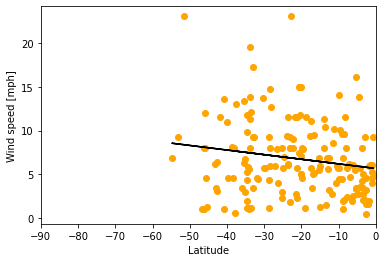

The plot above does not show any linear correlation between wind speed and latitude in the south hemisphere.



In [77]:
# Wind speed plots
regress_values=[]
(slope, intercept, rvalue, pvalue, stderr) = linregress(hem_south,ws_south)
print("R-square = " + str(round(rvalue **2,2)))
regress_values = np.asarray(hem_south) * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(hem_south,ws_south,  color = 'orange')
plt.plot(hem_south,regress_values,"black")
ax.annotate(line_eq,xy=(0.2, 0.2),xycoords='axes fraction',fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind speed [mph]')
plt.xlim(-90,0)
plt.savefig('output_data/ws_south.png')
plt.show()
if (rvalue**2)> 0.5:
    print('The plot above shows a linear correlation between wind speed and latitude in the south hemisphere.')
else:
    print('The plot above does not show any linear correlation between wind speed and latitude in the south hemisphere.')
print('')